# Nelaturi_MahemaReddy_FinalProject

##### Name: Mahema Reddy Nelaturi 
##### Github username: mahemareddy
##### USC ID: 2814429305

## 1. Text Classification

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from sklearn.model_selection import train_test_split

from collections import Counter
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM

### (a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.

### (b) Data Exploration and Pre-processing.
### i. You can use binary encoding for the sentiments , i.e y = 1 for positive senti-ments and y = −1 for negative sentiments.
### ii. The data are pretty clean. Remove the punctuation and numbers from the data.


In [2]:
PATHPOS = '../Data/pos'
PATHNEG= '../Data/neg'

In [3]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

In [4]:
def read_data_range(folder_path, start_index, end_index):
    data = []
    labels = []
    for i in range(start_index, end_index + 1):
        filename = os.path.join(folder_path, f"cv{i:03d}_*.txt") 
        matching_files = glob.glob(filename)
        if matching_files:
            with open(matching_files[0], 'r') as file: 
                review = file.read()
                review = preprocess_text(review)
                data.append(review)
                if os.path.basename(folder_path) == "pos":
                    labels.append(1)
                elif os.path.basename(folder_path) == "neg":
                    labels.append(-1)
    return data, labels

### iii. The name of each text file starts withcv number. Use text files 0-699 in eachclass for training and 700-999 for testing

In [5]:
train_pos_data, train_pos_labels = read_data_range(PATHPOS, 0, 699)
train_neg_data, train_neg_labels = read_data_range(PATHNEG, 0, 699)
test_pos_data, test_pos_labels = read_data_range(PATHPOS, 700, 999)
test_neg_data, test_neg_labels = read_data_range(PATHNEG, 700, 999)

# Combine train and test data
train_data = train_pos_data + train_neg_data
train_labels = train_pos_labels + train_neg_labels
test_data = test_pos_data + test_neg_data
test_labels = test_pos_labels + test_neg_labels

In [6]:
print(train_data[0])

films adapted from comic books have had plenty of success  whether theyre about superheroes  batman  superman  spawn   or geared toward kids  casper  or the arthouse crowd  ghost world   but theres never really been a comic book like from hell before  
for starters  it was created by alan moore  and eddie campbell   who brought the medium to a whole new level in the mid s with a part series called the watchmen  
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd  
the book  or  graphic novel   if you will  is over  pages long and includes nearly  more that consist of nothing but footnotes  
in other words  dont dismiss this film because of its source  
if you can get past the whole comic book thing  you might find another stumbling block in from hells directors  albert and allen hughes  
getting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in  well  an

### iv. Count the number of unique words in the whole dataset (train + test) and print it out.

In [7]:
all_data = train_data + test_data

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(all_data)
num_unique_words = len(tokenizer.word_index)

print("Number of unique words in the whole dataset:", num_unique_words)

Number of unique words in the whole dataset: 46737


### v. Calculate the average review length and the standard deviation of review lengths. Report the results

In [8]:
review_lengths = [len(review.split()) for review in all_data]
print(len(review_lengths))

avg_review_length = sum(review_lengths) / len(review_lengths)
std_dev_review_length = np.std(review_lengths)

print("Average review length:", avg_review_length)
print("Standard deviation of review lengths:", std_dev_review_length)

2000
Average review length: 644.3575
Standard deviation of review lengths: 284.98012333099655


### vi. Plot the histogram of review lengths.

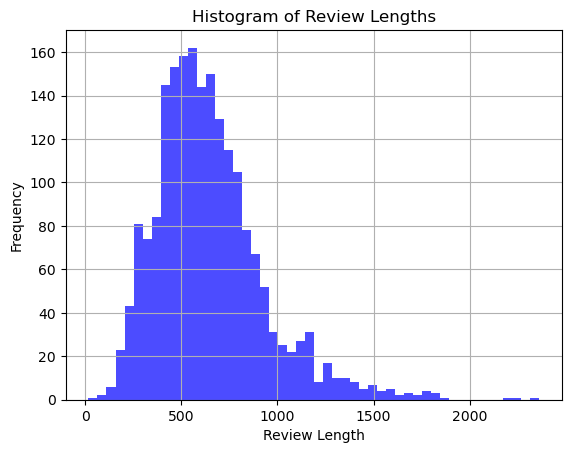

In [9]:
plt.hist(review_lengths, bins=50, color='blue', alpha=0.7)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths')
plt.grid(True)
plt.show()

### vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to rep-resent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.

In [10]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(all_data) 
x_train = tokenizer.texts_to_sequences(train_data)
x_test = tokenizer.texts_to_sequences(test_data)

In [11]:
print("\nTokenized representation:\n", x_train[0])


Tokenized representation:
 [67, 2745, 29, 355, 1634, 32, 90, 1047, 4, 627, 628, 321, 40, 704, 4783, 1755, 47, 1328, 396, 4949, 47, 1, 1777, 1778, 148, 16, 140, 108, 89, 68, 2, 355, 405, 39, 29, 503, 142, 12, 9, 31, 853, 21, 1352, 1802, 3, 944, 1512, 28, 879, 1, 3951, 5, 2, 282, 113, 540, 7, 1, 126, 11, 2, 202, 262, 381, 1, 5, 180, 1802, 3, 1512, 1882, 1, 845, 4, 495, 1, 69, 22, 39, 820, 325, 1231, 6, 2142, 5, 175, 2, 94, 1232, 1, 405, 47, 1549, 523, 51, 35, 65, 6, 111, 4950, 196, 3, 1233, 440, 42, 8, 4, 181, 16, 7, 73, 637, 119, 14, 15, 84, 4, 23, 2110, 51, 35, 64, 74, 403, 1, 282, 355, 405, 179, 35, 228, 188, 124, 2808, 7, 29, 880, 2858, 3, 1029, 2592, 333, 1, 2592, 620, 5, 1967, 14, 136, 178, 10, 2970, 10, 1089, 466, 7, 83, 232, 16, 103, 14, 28, 153, 5, 1967, 2, 15, 185, 260, 7, 1, 4628, 3, 629, 89, 996, 1036, 690, 58, 1, 1609, 384, 1261, 1009, 911, 1, 4628, 7, 486, 6, 4, 218, 7, 3316, 133, 23, 2, 235, 96, 1, 381, 20, 2142, 5, 74, 2, 94, 3240, 40, 14, 1147, 28, 33, 68, 121, 45, 3557

### viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

In [12]:
review_length = [len(seq) for seq in x_train + x_test]
L = int(np.percentile(review_length, 70))
print(L)


651


### ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L.


In [13]:
x_train = pad_sequences(x_train, maxlen=L)
x_test = pad_sequences(x_test, maxlen=L)



In [14]:
print("\nPadded representation:\n", x_train[0])


Padded representation:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   67 2745   29  355 1634   32   90
 1047    4  627  628  321   40  704 4783 1755   47 1328  396 4949   47
    1 1777 1778  148   16  140  108   89   68    2  355  405   39   29
  503  142   12    9   31  853   21 1352 1802    3  944 1512   28  879
    1 3951    5    2  282  113  540    7    1  126   11    2  202  262
  381    1    5  180 1802    3 1512 1882    1  845    4  495    1   69
   22   39  820  325 1231    6 2142    5  175    2   94 1232    1  405
   47 1549  523   51   35   65    6  111 4950  196    3 1233  440   42
    8    4  181   16    7   73  637  119   14   15   84    4   23 2110
   51   35   64   74  403    1  282  355  405  179  

## (c) Word Embeddings

### i.
One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector 
space are expected to be similar in meaning.” Most deep learning modules(including Keras) provide a convenient way to convert positive integer representations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are inter- ested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document. If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32×L matrix.

In [15]:
vocab_size = 5000 
embedding_dim = 32

model = Sequential()

In [16]:
model.add(Embedding(vocab_size, embedding_dim))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy')

model.build(input_shape=(None, L))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 651, 32)        │       160,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,000 (625.00 KB)

 Trainable params: 160,000 (625.00 KB)

 Non-trainable params: 0 (0.00 B)

None


### ii. Flatten the matrix of each document to a vector.

In [18]:
vocab_size = 5000 
embedding_dim = 32
max_review_length=737

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=L))

model.add(Flatten())

model.build(input_shape=(None, L))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

/Users/mahemareddy/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 651, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20832)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,000 (625.00 KB)

 Trainable params: 160,000 (625.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [20]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of x_train: (1400, 651)
Shape of x_test: (600, 651)
Shape of train_labels: (1400,)
Shape of test_labels: (600,)


### Map labels from {-1, 1} to {0, 1}

In [21]:
train_labels_mapped = np.where(train_labels == -1, 0, 1)
test_labels_mapped = np.where(test_labels == -1, 0, 1)

## (d) Multi-Layer Perceptron

### i.
Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

In [22]:
def MLP_model(input_length):
    model = Sequential([
        Embedding(5000, 32, input_length=input_length),
        Flatten(),
        Dropout(0.2),
        Dense(50, activation='relu'),
        Dropout(0.5),
        Dense(50, activation='relu'),
        Dropout(0.5),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [23]:
model = MLP_model(L)

history = model.fit(x_train, train_labels_mapped,
                    epochs=2,
                    batch_size=10,
                    validation_data=(x_test, test_labels_mapped))


Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5412 - loss: 0.6951 - val_accuracy: 0.5067 - val_loss: 0.6891
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6031 - loss: 0.6545 - val_accuracy: 0.5967 - val_loss: 0.6657


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (10, 651, 32)          │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (10, 20832)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (10, 20832)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (10, 50)               │     1,041,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (10, 50)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (10, 50)               │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (10, 50)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (10, 50)               │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (10, 1)                │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,620,405 (13.81 MB)

 Trainable params: 1,206,801 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,413,604 (9.21 MB)

### ii. Report the train and test accuracies of this model.

In [25]:
train_loss, train_accuracy = model.evaluate(x_train, train_labels_mapped, verbose=0)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, test_labels_mapped, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 84.50%
Test Accuracy: 59.67%


## (e) One-Dimensional Convolutional Neural Network:

Although CNNs are mainly used for image data, they can also be applied to text
data, as text also has adjacency information. Keras supports one-dimensional
convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.
### i.
After the embedding layer, insert a Conv1D layer. This convolutional layer
has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded
word representations 3 vector elements of the word embedding at a time. The
convolutional layer is followed by a 1D max pooling layer with a length and
stride of 2 that halves the size of the feature maps from the convolutional
layer. The rest of the network is the same as the neural network above.

In [26]:
def CNN_model(input_length):
    model = Sequential([
        Embedding(5000, 32, input_length=input_length),
        Conv1D(32, 3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dropout(0.2),
        Dense(50, activation='relu'),
        Dropout(0.5),
        Dense(50, activation='relu'),
        Dropout(0.5),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [27]:
model = CNN_model(L)

history = model.fit(x_train, train_labels_mapped,
                    epochs=2,
                    batch_size=10,
                    validation_data=(x_test, test_labels_mapped))


Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5207 - loss: 0.6948 - val_accuracy: 0.5233 - val_loss: 0.6917
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5392 - loss: 0.6897 - val_accuracy: 0.5583 - val_loss: 0.6837


In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (10, 651, 32)          │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (10, 649, 32)          │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (10, 324, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (10, 10368)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (10, 10368)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (10, 50)               │       518,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (10, 50)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (10, 50)               │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (10, 50)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (10, 50)               │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (10, 1)                │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,060,117 (7.86 MB)

 Trainable params: 686,705 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,373,412 (5.24 MB)

### ii. Report the train and test accuracies of this model.

In [29]:
train_loss, train_accuracy = model.evaluate(x_train, train_labels_mapped, verbose=0)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, test_labels_mapped, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 66.43%
Test Accuracy: 55.83%


## (f) Long Short-Term Memory Recurrent Neural Network

### i.
Each word is represented to LSTM as a vector of 32 elements and the LSTM
is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

In [30]:
def LSTM_model(input_length):
    model = Sequential([
        Embedding(5000, 32, input_length=input_length),
        LSTM(256, dropout=0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [31]:
model = LSTM_model(L)

history = model.fit(x_train, train_labels_mapped,
                    epochs=10,
                    batch_size=10,
                    validation_data=(x_test, test_labels_mapped))


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 354ms/step - accuracy: 0.5027 - loss: 0.6944 - val_accuracy: 0.5367 - val_loss: 0.6909
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 360ms/step - accuracy: 0.6688 - loss: 0.6858 - val_accuracy: 0.5883 - val_loss: 0.6564
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 356ms/step - accuracy: 0.8647 - loss: 0.3833 - val_accuracy: 0.6383 - val_loss: 0.7801
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 51s 363ms/step - accuracy: 0.9590 - loss: 0.1233 - val_accuracy: 0.6067 - val_loss: 0.9643
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 51s 365ms/step - accuracy: 0.9794 - loss: 0.0668 - val_accuracy: 0.6200 - val_loss: 1.5239
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 51s 365ms/step - accuracy: 0.9898 - loss: 0.0385 - val_accuracy: 0.6267 - val_loss: 1.3781
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 51s 363ms/step - accuracy: 0.9941 - loss: 0.0223 - val_accuracy: 0.6233 - val_loss: 1.7331
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 51s 367ms/step - accuracy: 0.9940 - loss: 0

### ii. Report the train and test accuracies of this model.

In [32]:
train_loss, train_accuracy = model.evaluate(x_train, train_labels_mapped, verbose=0)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, test_labels_mapped, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 98.71%
Test Accuracy: 63.33%


References:
- https://docs.python.org/3/library/os.path.html
- https://neptune.ai/blog/tokenization-in-nlp
- https://www.tensorflow.org/text/guide/word_embeddings
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html
- https://www.tensorflow.org/tutorials/images/cnn
- https://keras.io/api/layers/recurrent_layers/lstm/